### After scraping the web for the data and exporting it into a CSV we will start to get our hands really messy with the data. This data was messier than I expected and that was great! Because this is from a wiki where anyone can contribute, many of the columns had multiple formats which added to the challange. Let's import everything and get cleaning!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df = pd.read_excel('../Project - Data Cleaning - N_A/Weapon_Data.xlsx')
df0 = pd.read_excel('Weapon_Data.xlsx', sheet_name = 0)
df1 = pd.read_excel('Weapon_Data.xlsx', sheet_name = 1)
df2 = pd.read_excel('Weapon_Data.xlsx', sheet_name = 2)
df3 = pd.read_excel('Weapon_Data.xlsx', sheet_name = 3)

In [3]:
# I quickly add the specifed weapon type to each table in order to better identify them later.

df0['Type'] = 'Bracer'
df1['Type'] = 'Short_Sword'
df2['Type'] = 'Long_Sword'
df3['Type'] = 'Spear'

### To start off I am combining these 4 tables into a single one. Because they all have the same columns and basic elements we should be able to apply any data cleaning method  to all of them.

In [4]:
table = pd.concat(objs = [df0,df1,df2,df3],)

In [5]:
table.head(5)

,Weapon,Attack,Combo,Special Abilities,Location,Type
0,Bare Fists,LV1:100 - 100,LV1:Light: 4Heavy: 1,NaN,Initially available.,Bracer
1,Angel's Folly,LV1:150 - 165 LV4:570 - 627,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,ATK Speed Up Angel's Mercy (HP restored when d...,"[Route A, B, C/D] Bought from Emil's shop. Emi...",Bracer
2,Demon's Cry,LV1:100 - 180 LV4:380 - 684,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,ATK Speed Up Devil's Hatred (Adds an additiona...,[Route B] Found in the hidden basement of the ...,Bracer
3,Type-4O Fists,LV1:140 - 150 LV4:532 - 570,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,Stun Up Energy Charge (Increases Damage while ...,"[Route B] In the Resistance Camp, right beside...",Bracer
4,Type-3 Fists,LV1:110 - 170 LV4:418 - 646,LV1:Light: 3Heavy: 1 LV4:Light: 8Heavy: 3,Endurance Up (Increases DEF) Finish Blast (Add...,"[Route A, B, C/D] Bought from Emil's shop. Emi...",Bracer


In [6]:
table.index = range(0,40)

## Let's look at our columns a bit closer before cleaning anything.

### 1. Weapon: The name of the weapon. For aesthetic purposes only.
### 2. Attack: The attack value of the weapon. We are given the level 1 range (Minimum & Maximum) as well as the level 4 range. 
### 3. Combo: This shows how many times an attack can be executed before the character needs to rest. It also breaks it out between light and heavy attacks from level 1 and 4. A lot of information in a single column.
### 4. Special Abilities: This shows additional benefits for a particular weapon.
### 5. Location: Where in the game this is found.
### 6. Type: What type of weapon this is.



We will mainly be focusin on attack, combo, and type to start. However attack and combo are very dense and we will likely create more features from this.

The first objective is to parse out the minimum and maximum attack values for lvl 1 and lvl 4 weapons. This is definintly NOT the most pythonic method but to get the project moving this works.... for now.

In [7]:
def attack_minimum(x):
    minimum = x.split(':')[1].strip()[:3].strip()
    while True:
        try: 
            int(minimum)
            break
        except ValueError:
            minimum = x.split(':')[1].strip()[2:5].strip()
    return int(minimum)

In [8]:
def attack_maximum(x):
    maximum = x.split(':')[1].strip()
    a = maximum[6:]
    b = maximum[8:11]
    c = maximum[6:9]
    d = maximum[5:7]
    while True:
        try:
            int(a)
            maximum = a
            return int(maximum)
        except:
            try:
                int(b)
                maximum = b
                return int(maximum)
            except:
                try:
                    int(c)
                    maximum = c
                    return int(maximum)
                except:
                    return int(d)

In [9]:
table['Minimum Lvl1'] = table['Attack'].apply(attack_minimum)
table['Maximum Lvl1'] = table['Attack'].apply(attack_maximum)

In [10]:
table.head(5)

,Weapon,Attack,Combo,Special Abilities,Location,Type,Minimum Lvl1,Maximum Lvl1
0,Bare Fists,LV1:100 - 100,LV1:Light: 4Heavy: 1,NaN,Initially available.,Bracer,100,100
1,Angel's Folly,LV1:150 - 165 LV4:570 - 627,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,ATK Speed Up Angel's Mercy (HP restored when d...,"[Route A, B, C/D] Bought from Emil's shop. Emi...",Bracer,150,165
2,Demon's Cry,LV1:100 - 180 LV4:380 - 684,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,ATK Speed Up Devil's Hatred (Adds an additiona...,[Route B] Found in the hidden basement of the ...,Bracer,100,180
3,Type-4O Fists,LV1:140 - 150 LV4:532 - 570,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,Stun Up Energy Charge (Increases Damage while ...,"[Route B] In the Resistance Camp, right beside...",Bracer,140,150
4,Type-3 Fists,LV1:110 - 170 LV4:418 - 646,LV1:Light: 3Heavy: 1 LV4:Light: 8Heavy: 3,Endurance Up (Increases DEF) Finish Blast (Add...,"[Route A, B, C/D] Bought from Emil's shop. Emi...",Bracer,110,170


Text(0.5,1,'Level 1 Attack Power by Weapon')

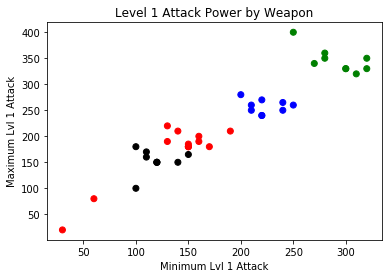

In [11]:
x = table['Minimum Lvl1']
y = table['Maximum Lvl1']
z = table['Type'].value_counts().index.values

colors = {z[0]:'red', z[1]:'blue', z[2]:'green', z[3]:'black'}

plt.figure(1)
plt.scatter(x,y, c = table['Type'].apply(lambda x: colors[x]))
plt.xlabel ('Minimum Lvl 1 Attack')
plt.ylabel ('Maximum Lvl 1 Attack')
plt.title ("Level 1 Attack Power by Weapon")

### Moving on to the Level 4 attacks, I wanted to find a bit more of a pythonic way to do this. Turns out List comprehension makes this a lot more natural instead of 4 different try statements. Eventually I can go back and fix my old code with this.

In [12]:
def attack_lv4_min(x):
    x = x.replace(':',' ')
    x = x.replace('-',' ')
    x = [int(float(s.strip())) for s in x.split() if s.isdigit()]
    if len(x) == 2:
        return (np.nan)
    elif len(x) == 5:
        return (x[3])
    elif len(x) == 3:
        return (x[1])
    else:
        return (x[2])
    
def attack_lv4_max(x):
    x = x.replace(':',' ')
    x = x.replace('-',' ')
    x = [int(float(s.strip())) for s in x.split() if s.isdigit()]
    if len(x) == 2:
        return (np.nan)
    elif len(x) == 5:
        return (x[4])
    elif len(x) == 3:
        return (x[2])
    else:
        return (x[3])

In [13]:
table['Minimum Lvl4'] = table['Attack'].apply(attack_lv4_min)
table['Maximum Lvl4'] = table['Attack'].apply(attack_lv4_max)

### Last but not least we need to clean up the "Combo" column. With lessons learned from everything else this turned out to be pretty easy.

In [14]:
def combo_split(x):
    x = [s for s in x]
    y = [int(s) for s in x if s.isdigit()]
    if len(y) ==3:
        a, b = y[0], y[1]
        z = [a,b]
        return list(z)
    else:
        a, b, c, d = y[1], y[2], y[4], y[5]
        z = [a,b,c,d]
        return list(z)

In [15]:
table['Combo_Numbers'] = table['Combo'].apply(combo_split)

In [16]:
table['Light Lvl1'] = table['Combo_Numbers'].apply(lambda x: x[0])
table['Heavy Lvl1'] = table['Combo_Numbers'].apply(lambda x: x[1])
table['Light Lvl4'] = table['Combo_Numbers'][1:].apply(lambda x: x[2])
table['Heavy Lvl4'] = table['Combo_Numbers'][1:].apply(lambda x: x[3])

In [17]:
table.head(5)

,Weapon,Attack,Combo,Special Abilities,Location,Type,Minimum Lvl1,Maximum Lvl1,Minimum Lvl4,Maximum Lvl4,Combo_Numbers,Light Lvl1,Heavy Lvl1,Light Lvl4,Heavy Lvl4
0,Bare Fists,LV1:100 - 100,LV1:Light: 4Heavy: 1,NaN,Initially available.,Bracer,100,100,NaN,NaN,"[1, 4]",1,4,NaN,NaN
1,Angel's Folly,LV1:150 - 165 LV4:570 - 627,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,ATK Speed Up Angel's Mercy (HP restored when d...,"[Route A, B, C/D] Bought from Emil's shop. Emi...",Bracer,150,165,570.0,627.0,"[5, 2, 8, 3]",5,2,8.0,3.0
2,Demon's Cry,LV1:100 - 180 LV4:380 - 684,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,ATK Speed Up Devil's Hatred (Adds an additiona...,[Route B] Found in the hidden basement of the ...,Bracer,100,180,380.0,684.0,"[5, 2, 8, 3]",5,2,8.0,3.0
3,Type-4O Fists,LV1:140 - 150 LV4:532 - 570,LV1:Light: 5Heavy: 2 LV4:Light: 8Heavy: 3,Stun Up Energy Charge (Increases Damage while ...,"[Route B] In the Resistance Camp, right beside...",Bracer,140,150,532.0,570.0,"[5, 2, 8, 3]",5,2,8.0,3.0
4,Type-3 Fists,LV1:110 - 170 LV4:418 - 646,LV1:Light: 3Heavy: 1 LV4:Light: 8Heavy: 3,Endurance Up (Increases DEF) Finish Blast (Add...,"[Route A, B, C/D] Bought from Emil's shop. Emi...",Bracer,110,170,418.0,646.0,"[3, 1, 8, 3]",3,1,8.0,3.0


### We finally have a decently clean dataset to work with for some basic visualizations and analysis. We may eventually break down "Special Abilities" and "Location" but the data cleaning would be much tougher and more variable. In addition these matter less for getting the basic "feel" for each weapon.